In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas.api.types import CategoricalDtype
import re
import math

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
months_dtype = CategoricalDtype(categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

In [3]:
df = pd.read_csv("finished-csvs/all-data-combined-long-format.csv", encoding="utf-8", dtype={'Month':months_dtype})
df

,Institution,Subcategory,Metric Title,Year,Month,Value
0,ASP,ASU EOP Hub,Actual Population,2009,Jan,0
1,ASP,ASU Overflow,Actual Population,2009,Jan,0
2,ASP,Academic Programs -\nAttendance Tracking,Average # Days in School (DIS),2009,Jan,98
3,ASP,Academic Programs -\nAttendance Tracking,Average Daily Attendance,2009,Jan,663
4,ASP,Academic Programs -\nAttendance Tracking,Avg. Length of Time in Assignment(LTA),2009,Jan,154
...,...,...,...,...,...,...
3337340,WSP,Type of Force,37 mm/40 mm,2023,Oct,2
3337341,WSP,Type of Force,Baton,2023,Oct,1
3337342,WSP,Type of Force,Non-Conventional Force,2023,Oct,0
3337343,WSP,Type of Force,OC,2023,Oct,8


In [4]:
# Filter only high security prisons

high_security = ["CAC", "CCI", "COR", "LAC", "SAC", "HDSP", "KVSP", "PBSP", "SVSP"] #omit SATF
df_highsecurity = df.drop(df[~df['Institution'].isin(high_security)].index, axis=0).reset_index(drop=True)
df_highsecurity.head()

,Institution,Subcategory,Metric Title,Year,Month,Value
0,CCI,ASU EOP Hub,Actual Population,2009,Jan,0
1,CCI,ASU Overflow,Actual Population,2009,Jan,26
2,CCI,Academic Programs -\nAttendance Tracking,Average # Days in School (DIS),2009,Jan,74
3,CCI,Academic Programs -\nAttendance Tracking,Average Daily Attendance,2009,Jan,280
4,CCI,Academic Programs -\nAttendance Tracking,Avg. Length of Time in Assignment(LTA),2009,Jan,144


In [5]:
UOF = df_highsecurity[df_highsecurity['Metric Title'].str.contains("Documented Use of Force|Total Number of Documented Force", regex=True)]
UOF

,Institution,Subcategory,Metric Title,Year,Month,Value
334,CCI,Number of Incidents,Total Number of Documented Force,2009,Jan,12
846,COR,Number of Incidents,Total Number of Documented Force,2009,Jan,21
1355,HDSP,Number of Incidents,Total Number of Documented Force,2009,Jan,30
1866,KVSP,Number of Incidents,Total Number of Documented Force,2009,Jan,26
2405,LAC,Number of Incidents,Total Number of Documented Force,2009,Jan,36
...,...,...,...,...,...,...
866292,KVSP,Number of Incidents,Documented Use of Force,2023,Oct,43
866361,LAC,Number of Incidents,Documented Use of Force,2023,Oct,81
866421,PBSP,Number of Incidents,Documented Use of Force,2023,Oct,15
866489,SAC,Number of Incidents,Documented Use of Force,2023,Oct,65


In [6]:
POP = df_highsecurity[df_highsecurity['Metric Title'].str.contains("Inmate Count", regex=True)]
POP

,Institution,Subcategory,Metric Title,Year,Month,Value
441,CCI,Total Bed Capacity,Inmate Count,2009,Jan,5703
953,COR,Total Bed Capacity,Inmate Count,2009,Jan,5654
1462,HDSP,Total Bed Capacity,Inmate Count,2009,Jan,4415
1973,KVSP,Total Bed Capacity,Inmate Count,2009,Jan,4789
2512,LAC,Total Bed Capacity,Inmate Count,2009,Jan,4906
...,...,...,...,...,...,...
861822,KVSP,Total Bed Capacity,Inmate Count,2023,Jun,2793
862456,LAC,Total Bed Capacity,Inmate Count,2023,Jun,2660
863082,PBSP,Total Bed Capacity,Inmate Count,2023,Jun,1627
863715,SAC,Total Bed Capacity,Inmate Count,2023,Jun,1759


In [7]:
POP.drop_duplicates(inplace=True, ignore_index=True)

/var/folders/bs/5lqn96f965n5hzb1wwjqj37w0000gn/T/ipykernel_47160/2867542206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POP.drop_duplicates(inplace=True, ignore_index=True)


In [8]:
UOF.drop_duplicates(inplace=True, ignore_index=True)

/var/folders/bs/5lqn96f965n5hzb1wwjqj37w0000gn/T/ipykernel_47160/726273487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UOF.drop_duplicates(inplace=True, ignore_index=True)


In [9]:
df_merged = UOF.merge(POP, on=['Institution', 'Year', 'Month'], how='inner')
df_merged

,Institution,Subcategory_x,Metric Title_x,Year,Month,Value_x,Subcategory_y,Metric Title_y,Value_y
0,CCI,Number of Incidents,Total Number of Documented Force,2009,Jan,12,Total Bed Capacity,Inmate Count,5703
1,COR,Number of Incidents,Total Number of Documented Force,2009,Jan,21,Total Bed Capacity,Inmate Count,5654
2,HDSP,Number of Incidents,Total Number of Documented Force,2009,Jan,30,Total Bed Capacity,Inmate Count,4415
3,KVSP,Number of Incidents,Total Number of Documented Force,2009,Jan,26,Total Bed Capacity,Inmate Count,4789
4,LAC,Number of Incidents,Total Number of Documented Force,2009,Jan,36,Total Bed Capacity,Inmate Count,4906
...,...,...,...,...,...,...,...,...,...
1596,KVSP,Number of Incidents,Documented Use of Force,2023,Jun,35,Total Bed Capacity,Inmate Count,2793
1597,LAC,Number of Incidents,Documented Use of Force,2023,Jun,91,Total Bed Capacity,Inmate Count,2660
1598,PBSP,Number of Incidents,Documented Use of Force,2023,Jun,9,Total Bed Capacity,Inmate Count,1627
1599,SAC,Number of Incidents,Documented Use of Force,2023,Jun,47,Total Bed Capacity,Inmate Count,1759


In [10]:
df_merged_simplified = df_merged.drop(columns=['Subcategory_x','Metric Title_x', 'Subcategory_y', 'Metric Title_y'])
df_merged_simplified

,Institution,Year,Month,Value_x,Value_y
0,CCI,2009,Jan,12,5703
1,COR,2009,Jan,21,5654
2,HDSP,2009,Jan,30,4415
3,KVSP,2009,Jan,26,4789
4,LAC,2009,Jan,36,4906
...,...,...,...,...,...
1596,KVSP,2023,Jun,35,2793
1597,LAC,2023,Jun,91,2660
1598,PBSP,2023,Jun,9,1627
1599,SAC,2023,Jun,47,1759


In [11]:
df_renamed = df_merged_simplified.rename({'Value_x':'Use of Force', 'Value_y':'Inmate Count'}, axis=1)
df_renamed

,Institution,Year,Month,Use of Force,Inmate Count
0,CCI,2009,Jan,12,5703
1,COR,2009,Jan,21,5654
2,HDSP,2009,Jan,30,4415
3,KVSP,2009,Jan,26,4789
4,LAC,2009,Jan,36,4906
...,...,...,...,...,...
1596,KVSP,2023,Jun,35,2793
1597,LAC,2023,Jun,91,2660
1598,PBSP,2023,Jun,9,1627
1599,SAC,2023,Jun,47,1759


In [12]:
df_renamed.drop_duplicates(inplace=True, ignore_index=True)

In [13]:
df_UOF_rate = df_renamed.astype({'Use of Force':'Int64', 'Inmate Count':'Int64'})
df_UOF_rate.dtypes

Institution       object
Year               int64
Month           category
Use of Force       Int64
Inmate Count       Int64
dtype: object

In [14]:
df_UOF_rate['Rate'] = df_UOF_rate['Use of Force'] / df_UOF_rate['Inmate Count'] * 1000
df_UOF_rate

,Institution,Year,Month,Use of Force,Inmate Count,Rate
0,CCI,2009,Jan,12,5703,2.104156
1,COR,2009,Jan,21,5654,3.714185
2,HDSP,2009,Jan,30,4415,6.795017
3,KVSP,2009,Jan,26,4789,5.429108
4,LAC,2009,Jan,36,4906,7.337954
...,...,...,...,...,...,...
1596,KVSP,2023,Jun,35,2793,12.531328
1597,LAC,2023,Jun,91,2660,34.210526
1598,PBSP,2023,Jun,9,1627,5.531653
1599,SAC,2023,Jun,47,1759,26.719727


In [15]:
df_UOF_rate.groupby(['Institution'])['Rate'].mean()

Institution
CAC      1.473051
CCI      6.114485
COR      7.669716
HDSP     6.644372
KVSP     8.939474
LAC     10.954049
PBSP     4.657367
SAC     17.720783
SVSP    12.297445
Name: Rate, dtype: Float64

In [16]:
df_UOF_rate['Rate'].mean()

8.817004951945584

In [17]:
df_UOF_rate.to_csv("analysis/use_of_force.csv", encoding="utf-8", index=False)

In [18]:
df_UOF_by_year = df_UOF_rate.groupby(['Year','Institution'])['Rate'].mean().reset_index()
df_UOF_by_year

,Year,Institution,Rate
0,2009,CCI,3.78789
1,2009,COR,3.544667
2,2009,HDSP,7.011149
3,2009,KVSP,5.403689
4,2009,LAC,6.755302
5,2009,PBSP,4.561298
6,2009,SAC,11.998722
7,2009,SVSP,9.220388
8,2010,CCI,3.519126
9,2010,COR,3.618587


In [19]:
df_pivot = df_UOF_by_year.pivot(index='Year', columns='Institution', values='Rate')
df_pivot

Institution,CAC,CCI,COR,HDSP,KVSP,LAC,PBSP,SAC,SVSP
Year,,,,,,,,,
2009,<NA>,3.78789,3.544667,7.011149,5.403689,6.755302,4.561298,11.998722,9.220388
2010,<NA>,3.519126,3.618587,7.449524,7.89504,7.812434,4.995485,11.257568,10.319387
2011,<NA>,5.076671,5.061804,6.573171,7.783116,8.796594,5.266022,12.546238,12.918531
2012,<NA>,3.654187,5.648797,7.096301,8.740767,9.571889,6.247776,12.253709,11.556532
2013,<NA>,3.350852,5.808224,5.769188,9.077043,9.790126,6.006076,14.22398,12.029029
2014,1.592997,3.138168,6.03906,6.661476,6.951336,10.091247,2.818863,19.307105,11.262252
2015,<NA>,2.971186,6.27283,6.241873,7.375688,10.841917,3.146455,20.724475,9.986828
2016,0.392045,5.733652,8.416308,5.413288,9.431876,9.156539,4.851241,19.849676,11.425164
2017,1.064789,7.970874,12.266563,5.928961,10.533691,12.358959,4.047213,18.824785,10.486783


<Axes: xlabel='Year'>

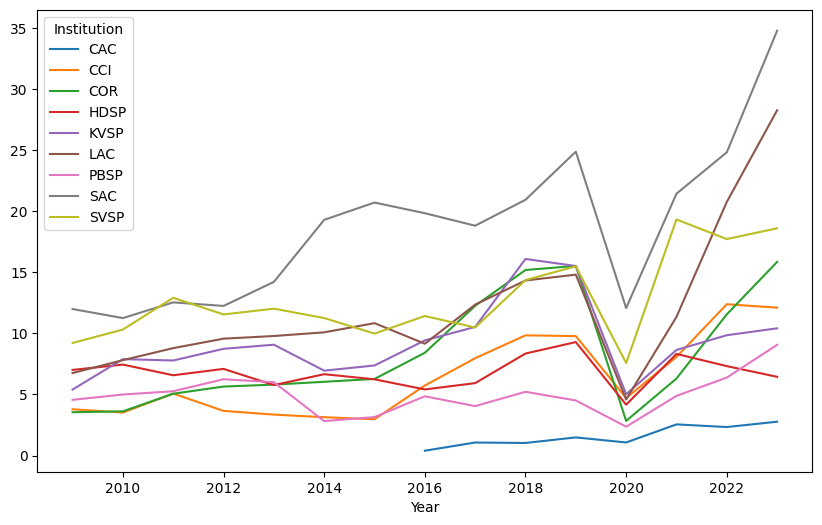

In [20]:
df_pivot.plot(figsize=(10,6))

In [21]:
df_UOF_by_month = df_UOF_rate.groupby(by=['Year','Month','Institution'])['Rate'].mean().reset_index()
df_UOF_by_month

/var/folders/bs/5lqn96f965n5hzb1wwjqj37w0000gn/T/ipykernel_47160/1746797095.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_UOF_by_month = df_UOF_rate.groupby(by=['Year','Month','Institution'])['Rate'].mean().reset_index()


,Year,Month,Institution,Rate
0,2009,Jan,CAC,<NA>
1,2009,Jan,CCI,2.104156
2,2009,Jan,COR,3.714185
3,2009,Jan,HDSP,6.795017
4,2009,Jan,KVSP,5.429108
...,...,...,...,...
1615,2023,Dec,KVSP,<NA>
1616,2023,Dec,LAC,<NA>
1617,2023,Dec,PBSP,<NA>
1618,2023,Dec,SAC,<NA>


In [38]:
df_UOF_by_month_pivot = df_UOF_by_month.pivot(index=['Year','Month'], columns='Institution', values='Rate')
df_UOF_by_month_pivot

Institution       CAC        CCI        COR       HDSP       KVSP        LAC       PBSP        SAC       SVSP
Year Month                                                                                                   
2009 Jan         <NA>   2.104156   3.714185   6.795017   5.429108   7.337954   3.535651  17.200675   7.045798
     Feb         <NA>   4.314995   3.595829   7.459313   4.603474   7.106599    3.55345    8.77489   8.044243
     Mar         <NA>   5.324206   3.814714   8.762076   5.418925   8.507989   5.993407   13.69863   8.174387
     Apr         <NA>   4.011461   3.257919   6.055169   4.561476   7.734807   2.678571  10.020733   8.056872
     May         <NA>   4.209721   2.586366   8.902738   7.475083   7.388092   7.491759  14.103887  10.218631
     Jun         <NA>   3.735525   2.773156   7.266122   4.014367   6.294964   4.297115  13.296011  11.396011
     Jul         <NA>   4.317323   3.685957   5.609154     6.1689   7.378472   5.564142  12.114919  10.630408
     Aug         <NA>   3.112571   3.167505   6.723442   6.599957    6.61545   4.970488   12.22067  11.646804
     Sep         <NA>   4.528828   3.989362   5.782918   5.260943    5.28653   4.361371   9.256085  10.041841
     Oct         <NA>   3.522308   4.011461   6.261181   4.424779   3.197612   2.492212  12.741047   9.840426
     Nov         <NA>   3.057065   3.375844   7.160439   5.280946   5.448997   3.591739   8.757704   5.428882
     Dec         <NA>   3.216523   4.563709   7.356219   5.606312   8.766163   6.205674   11.79941   10.12035
2010 Jan         <NA>    2.52738   2.734731    6.90577   6.672227   7.804032   6.237006   9.878169  10.829371
     Feb         <NA>   3.870099   2.900127   3.732162   7.293186   7.346586   7.464915   8.606422    9.02096
     Mar         <NA>   5.107252   3.082502   8.624502   6.644518  10.338759   3.549246  10.678608   8.224993
     Apr         <NA>   2.519315   2.067281   7.385855   5.819996   8.705114   5.102041  14.026685  14.550265
     May         <NA>   4.269126   4.390151   8.886914   6.416891    7.94702   8.433735  11.957636   7.637609
     Jun         <NA>   3.206751   2.889617  10.738255    7.97984   8.216744   3.928679  14.710913   7.182761
     Jul         <NA>   3.015075   3.259202   7.599464   9.388646    8.91886    5.78739  11.015491  11.729405
     Aug         <NA>   2.180476   5.626698   8.602651    8.44556   5.550622    4.29053   9.989666   7.506702
     Sep         <NA>   3.419973   2.935995   9.059233  10.041476   9.366637   3.996311  11.258956  10.875332
     Oct         <NA>   4.814305   4.523107   4.678363   7.692308   8.435072   4.651163   11.19403  14.430786
     Nov         <NA>   2.781158   3.208985   6.589786   8.069654   5.561735    1.84786  14.060357    12.5803
     Dec         <NA>   4.518596   5.804644   6.591337  10.276172   5.558026   4.656939   7.713885   9.264161
2011 Jan         <NA>   3.709592   4.151962   4.549808   7.067895   8.012464   4.345127   9.252669  18.837888
     Feb         <NA>   3.418496   3.006873   6.481037   7.075472   8.001829    2.21169  11.075384  12.752391
     Mar         <NA>   3.966823   4.648343     4.8391   7.547984   8.204193   8.170962   9.743775  14.099495
     Apr         <NA>   5.000893   5.078204   3.804994   5.202688  10.107972   6.973059  12.328285  10.233535
     May         <NA>   5.411067   4.641776   8.051148   8.643042   8.333333   6.489293  14.084507  15.171331
     Jun         <NA>   5.865624   3.211562   6.815511    9.82906   7.866728   6.381621  13.333333   9.538541
     Jul         <NA>    6.28053   7.383101  10.846498  10.173802   9.478673   6.537983  16.566796  10.872314
     Aug         <NA>   5.464481    6.95581   7.686932  10.214939  10.722611   2.759044  12.056738  13.716027
     Sep         <NA>   4.911419   4.595405   6.756757   7.685739   6.502555   3.056235  13.679411  14.683544
     Oct         <NA>   4.901071   5.210421   7.984515   9.289263   8.560851   3.717472    15.1622   9.794073
     Nov         <NA>   6.684492   5.812

<Axes: xlabel='Year,Month'>

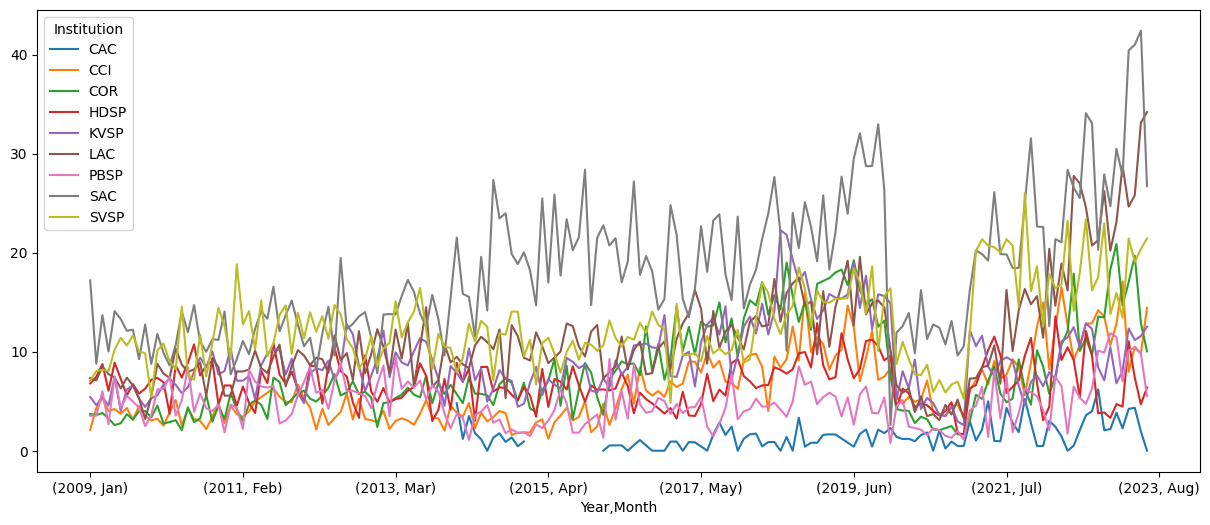

In [40]:
df_UOF_by_month_pivot.plot(figsize=(15,6))